# 🤓 Chapter 3. Part 5: Non-linear Transformations of the Predictors

In this section, we will explore an example of Non-linear Transformations of the Predictors analysis using the Boston dataset. Let's jump in!

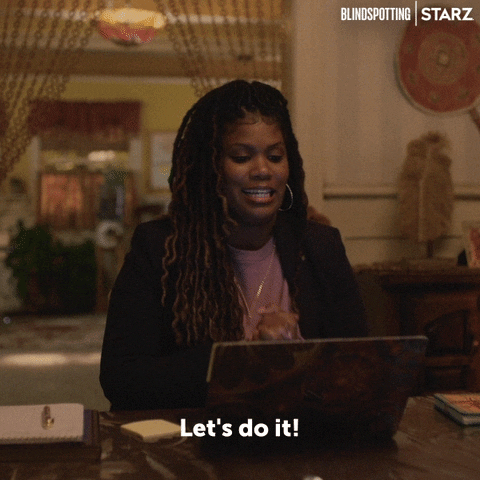

#### 📚 Theory Summary

Non-linear transformations of predictors involve modifying the predictors in a non-linear fashion, such as squaring them or taking their logarithms, to better capture complex relationships between predictors and the response variable.


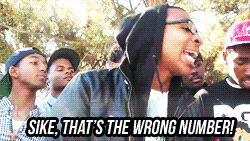




### 📦 Load Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

import warnings
warnings.filterwarnings("ignore")

### 🔢 Load Data

In [2]:
Boston = load_data('Boston')

For this example, we will utilize the `ModelSpec()` and the `poly()` function.

In [3]:
X1 = MS([poly('lstat', degree=1), 'age']).fit_transform(Boston)
X2 = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
y = Boston['medv']

model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()

In [4]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.98e-88
Time:                        19:15:34   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                20.16

In [5]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          7.03e-120
Time:                        19:15:34   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

#### ANOVA Anlysis

In [6]:
anova_lm(model1, model2)

df_resid           ssr  df_diff      ss_diff           F        Pr(>F)
0     503.0  19168.128609      0.0          NaN         NaN           NaN
1     502.0  14165.613251      1.0  5002.515357  177.278785  7.468491e-35

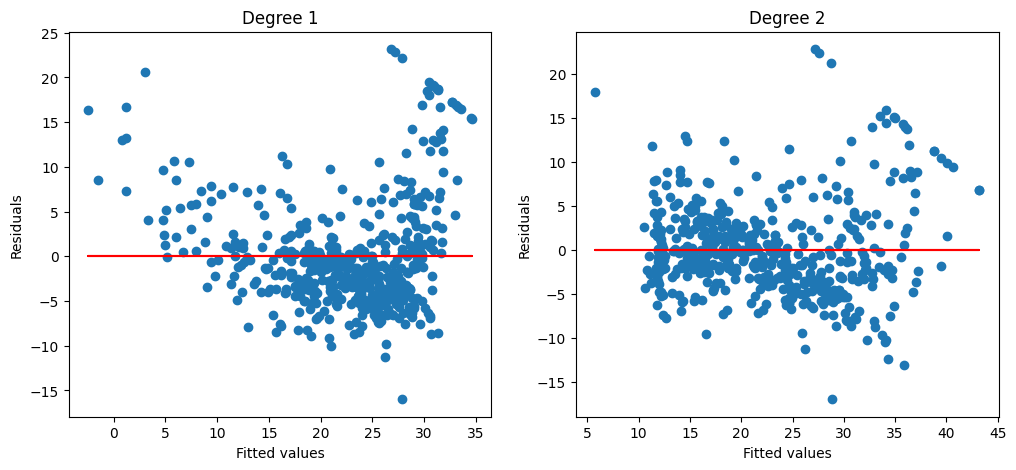

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot fitted values vs. residuals with fitted polynomial lines
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Degree 1
ax[0].scatter(model1.fittedvalues, model1.resid)
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Degree 1')
ax[0].plot(model1.fittedvalues, np.zeros_like(model1.fittedvalues), color='r')  # Add fitted polynomial line

# Plot for Degree 2
ax[1].scatter(model2.fittedvalues, model2.resid)
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Degree 2')
ax[1].plot(model2.fittedvalues, np.zeros_like(model2.fittedvalues), color='r')  # Add fitted polynomial line


# On to the next one ➜

Next, we will delve into `Qualitative Predictors`.

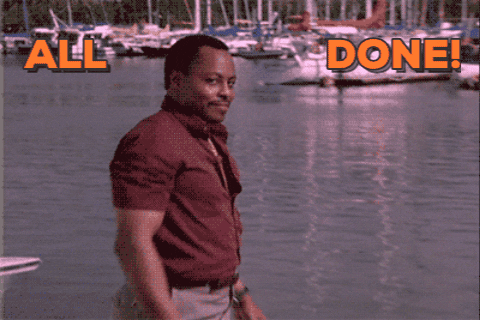